
#Haberman DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload=files.upload()

Saving haberman.csv to haberman.csv


In [3]:
# Loading the dataset
haberman=pd.read_csv('haberman.csv')

In [4]:
haberman.head(5)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


## Data information

In [5]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
haberman.shape

(305, 4)

### So we have 305 rows of entry and 4 different columns without attribute.         
### For categorical plotting we need to name the columns first based on thier character.

In [7]:
# naming of columns
cancer_df = pd.read_csv('haberman.csv', header=None, 
            names =['age', 'year_of_treatment','positive_lymph_nodes', 'survival_status_after_5_year'])

In [8]:
cancer_df.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_year'],
      dtype='object')

In [9]:
cancer_df.head(5)

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_year
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [10]:
cancer_df['survival_status_after_5_year'].unique()

array([1, 2])

### The dependent variable contains only two unique values such as 1 and 2.        
### We can change it to 0 and 1 or No and Yes for better understanding.

In [11]:
cancer_df['survival_status_after_5_year']=cancer_df['survival_status_after_5_year'].apply(lambda x:'no' if x==2 else 'yes')

In [12]:
cancer_df.head(5)

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_year
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [13]:
# Counting the number of 'yes' and 'no'
cancer_df['survival_status_after_5_year'].value_counts()

yes    225
no      81
Name: survival_status_after_5_year, dtype: int64

In [14]:
# Getting the percentage figure of 'yes' and 'on'
cancer_df.groupby('survival_status_after_5_year').size()/cancer_df['survival_status_after_5_year'].count()*100

survival_status_after_5_year
no     26.470588
yes    73.529412
dtype: float64

### So this is an imbalanced dataset as surving number is more than non surviving number.           
### Surviving number is 73% while non surviving number is 26%

## Bi-variable analysis

### 2D Scatter Plot

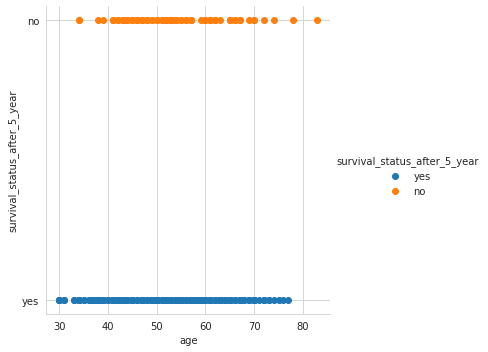

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer_df, hue='survival_status_after_5_year', height=5).map(plt.scatter,
                                                    'age','survival_status_after_5_year').add_legend()

### Patients aged between 78 to 80+ could not survive more than 5 years.      
### Patients aged between 30 to 33 survived more than 5 years.

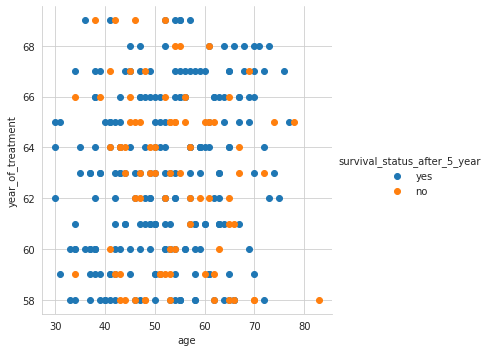

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer_df, hue='survival_status_after_5_year', height=5).map(plt.scatter,
                                                          'age','year_of_treatment').add_legend()

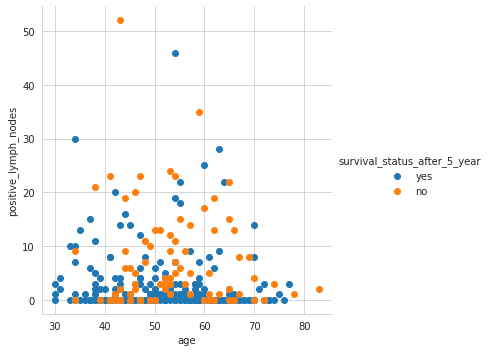

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer_df, hue='survival_status_after_5_year', height=5).map(plt.scatter,
                                                          'age','positive_lymph_nodes').add_legend()

### Patients having positive lymph nodes aged between 78 to 80+ could not survive   more than 5 years.

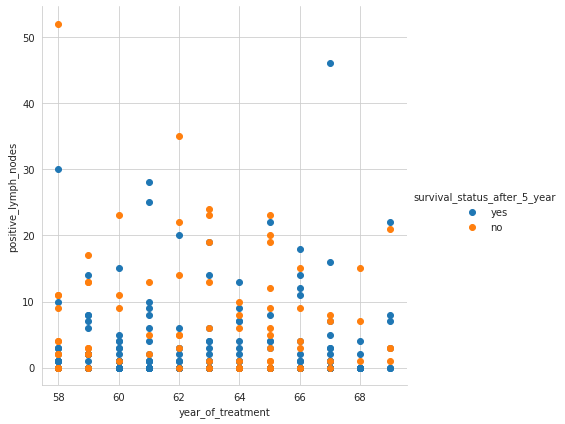

In [18]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer_df, hue='survival_status_after_5_year', height=6).map(plt.scatter, 
                                                            'year_of_treatment','positive_lymph_nodes').add_legend()

### In 1961, with positive lympy nodes upto 28 more patients survived more than 5 years.                            
### In 1965, with positive lymph nodes upto 24 most patients could not survived more than 5 years.                      
### Patient having positive lymph nodes more than 50 could not survived more than 5 years.                  
### Patients having positive lymph nodes from 31 to 52+ have surviving chance approximatly 1/3 i.e 33.33%.

## Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(22.929976851851862, 0.5, 'Density')

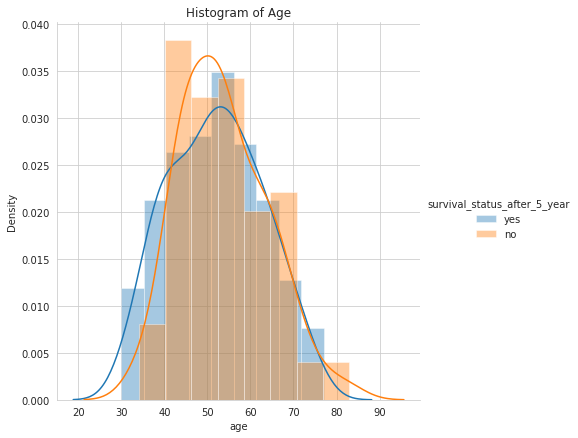

In [19]:
sns.FacetGrid(cancer_df, hue='survival_status_after_5_year', height=6).map(sns.distplot,'age').add_legend()
plt.title('Histogram of Age')
plt.ylabel('Density')

### **Its** almost completely each other but somehow we can say greater number of patients approx38%                                                                                                           at the age of 40 to 50 did not survive after 5 years.
### Can not classify because of the huge overlapping.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(23.54312500000001, 0.5, 'Density')

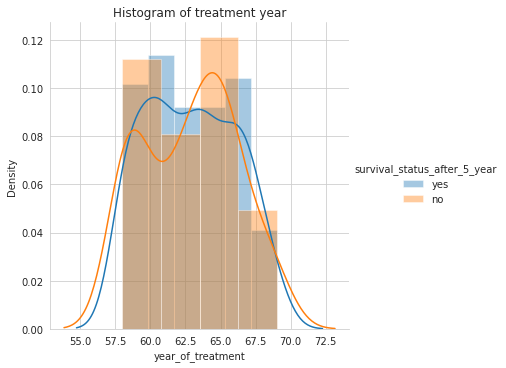

In [20]:
sns.FacetGrid(cancer_df, hue='survival_status_after_5_year', height=5,).map(sns.distplot,'year_of_treatment').add_legend()
plt.title('Histogram of treatment year')
plt.ylabel('Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(16.855729166666677, 0.5, 'Density')

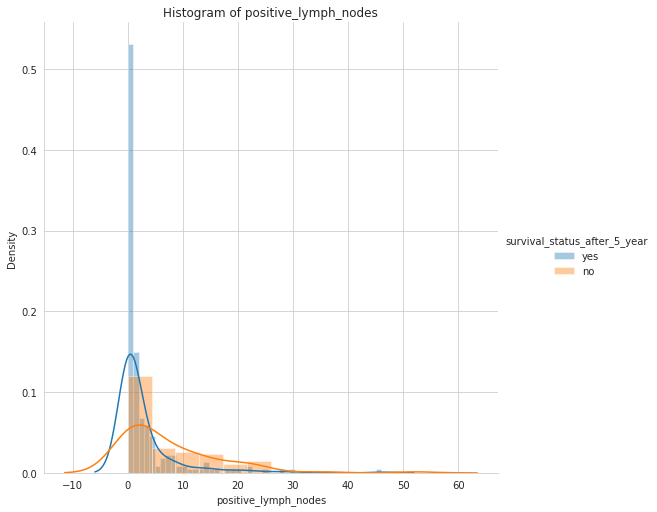

In [22]:
sns.FacetGrid(cancer_df, hue='survival_status_after_5_year', height=7,).map(sns.distplot,'positive_lymph_nodes').add_legend()
plt.title('Histogram of positive_lymph_nodes')
plt.ylabel('Density')

### **With** more positive lymph nodes non survival is greater compared to survival.      bold text
### Patients with less lymph nodes i.e near to zero have chances to more survival, nearly 30% patients based on PDF.

## Pair plot

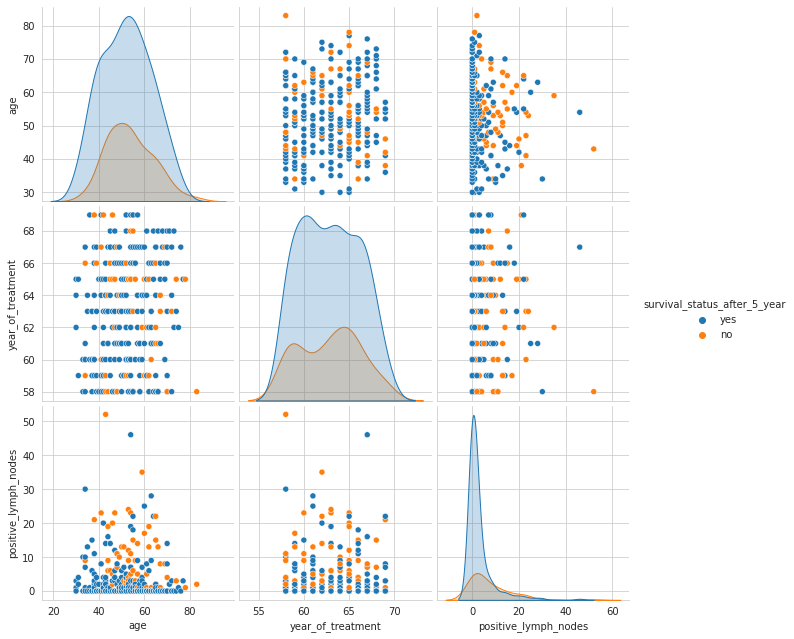

In [23]:
sns.set_style('whitegrid')
sns.pairplot(cancer_df, hue='survival_status_after_5_year', height=3)

## Boxplot and Whiskers

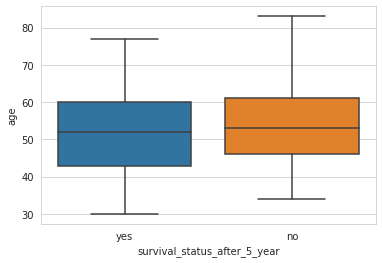

In [24]:
sns.boxplot(x='survival_status_after_5_year', y='age', data=cancer_df)

### We can observe ages of survived patients lie between 30 to 77 approx and 75% of them are upto 60.           
### Ages of died patients lie between 34 to 85 approx and 75% of them are under 62.          
### That means patients with age 30 to 33 are more likely to survived.

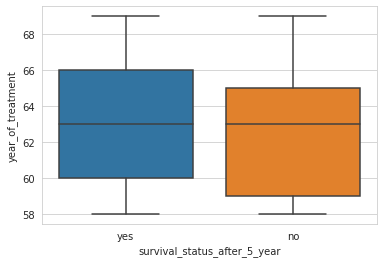

In [25]:
sns.boxplot(x='survival_status_after_5_year', y='year_of_treatment', data=cancer_df)

### In both cases the range of treatment year is same.              
### In the year 1965-66, patients are more likely to survive however before 1960 patients had more chance of death.

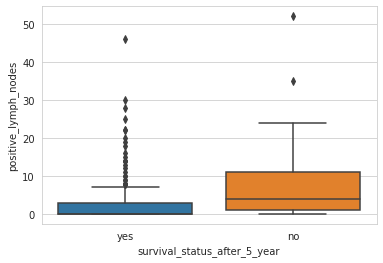

In [26]:
sns.boxplot(x='survival_status_after_5_year', y='positive_lymph_nodes', data=cancer_df)

### There are many outliers that makes difficult for any decision.             
### However can patients with zero lymph node survived but patients with more than 3 lymph nodes are more likely to die.            
### Most of the survivors have less than 8 lymph nodes.

## Violin plots

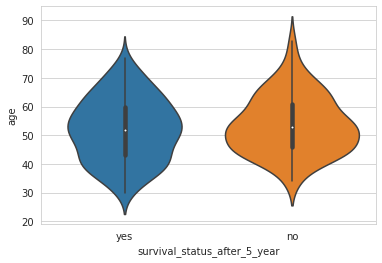

In [27]:
sns.violinplot(x='survival_status_after_5_year',y='age',data=cancer_df, size=8)

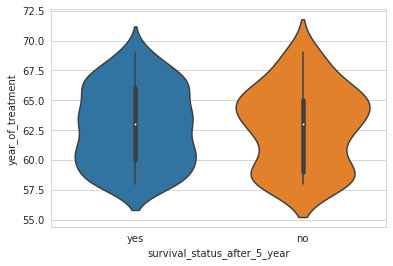

In [28]:
sns.violinplot(x='survival_status_after_5_year',y='year_of_treatment',data=cancer_df, size=8)

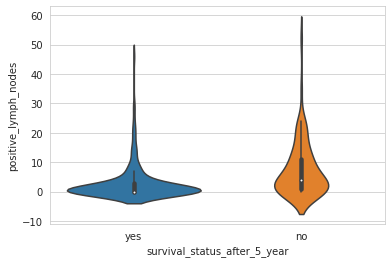

In [29]:
sns.violinplot(x='survival_status_after_5_year',y='positive_lymph_nodes',data=cancer_df, size=8)

### Violins also state the same results as Boxplots and Whiskers.

## Conclusion

### The dataset is very musch versalite.plots are overlapping each other.           
### We can hardly say that Patients with aged less than 40 or more specifically 30 to 33 and having less(less than or equal to 3)positive lymph nodes can survived.           
### Patients with more age and more positive lymph nodes have less chance to survive more than 5 years.               
### Patients aged more than 70 having positive lymph nodes are not likely to survive.               
### But the dataset is very hard to classify directly.             
### Maybe some pruning can convert the dataset into an eligible dataset for applying decisive algorithms.